## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


##### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step-1: Reading and Understandiong of Data

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
## read the data
bike= pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.shape

(730, 16)

In [4]:
bike.info()

## no missing values are observed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike['dteday'] =  pd.to_datetime(bike['dteday'],format='%d-%m-%Y')
bike['dteday'].dtype


dtype('<M8[ns]')

In [7]:
bike['year'] = pd.DatetimeIndex(bike['dteday']).year
bike['month'] = pd.DatetimeIndex(bike['dteday']).month

In [8]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [9]:
bike=bike.drop(['dteday','yr','mnth','holiday'], axis=1)
bike.head()

,instant,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,1,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,1,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,1,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,1,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,1,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [10]:
bike=bike.drop(['instant','registered','casual'], axis=1)
bike.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


## Step-2: Preparing the data for modelling

###### Encoding and Visualisation
    * season: (1:spring, 2:summer, 3:fall, 4:winter)
    * weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    * workingday: 1:Workingday, 0:Holiday
    * month: 1-12: Jan-Dec
    * weekday: 0-6: Mon-Sun
    * year: 2018:0, 2019:1

In [11]:
#season
codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
bike['season']=bike['season'].map(codes)

bike.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,spring,6,0,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,spring,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,spring,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,spring,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,spring,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


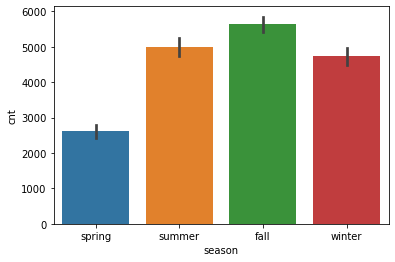

In [12]:
sns.barplot('season', 'cnt', data=bike)
plt.show()

#Conclusion: Bike rental demand is more during Fall season

In [13]:
#weathersit
codes = {1:'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'}
bike['weathersit']=bike['weathersit'].map(codes)

bike.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,spring,6,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,spring,0,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,spring,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,spring,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,spring,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,2018,1


C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


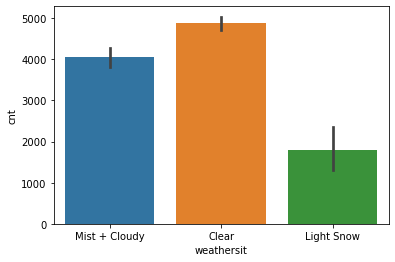

In [14]:
sns.barplot('weathersit', 'cnt', data=bike)
plt.show()

#Conclusion: Bike rental demand is more when weather is clear

In [15]:
#Workingday
codes = {1:'Workingday',0:'Holiday'}
bike['workingday']=bike['workingday'].map(codes)

bike.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,spring,6,Holiday,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,spring,0,Holiday,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,spring,1,Workingday,Clear,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,spring,2,Workingday,Clear,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,spring,3,Workingday,Clear,9.305237,11.46350,43.6957,12.522300,1600,2018,1


C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


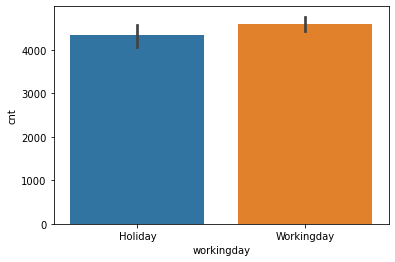

In [16]:
sns.barplot('workingday', 'cnt', data=bike)
plt.show()

#Conclusion: Bike rental demand is more on workingday

In [17]:
#month
codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bike['month']=bike['month'].map(codes)

bike.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,spring,6,Holiday,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985,2018,Jan
1,spring,0,Holiday,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801,2018,Jan
2,spring,1,Workingday,Clear,8.050924,9.47025,43.7273,16.636703,1349,2018,Jan
3,spring,2,Workingday,Clear,8.200000,10.60610,59.0435,10.739832,1562,2018,Jan
4,spring,3,Workingday,Clear,9.305237,11.46350,43.6957,12.522300,1600,2018,Jan


C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


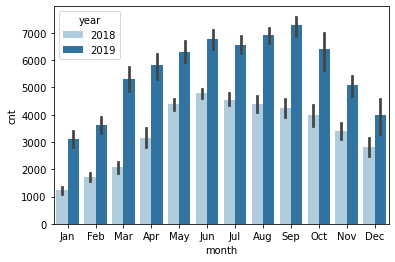

In [18]:
#plt.figure(figsize=(10,8))

sns.barplot('month','cnt',hue='year',data=bike,palette='Paired')

plt.show()

#Conclusion: Bike rental demand was increased in 2019 as compared to 2018

In [19]:
#weekday
codes = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bike['weekday'] = bike['weekday'].map(codes)

C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


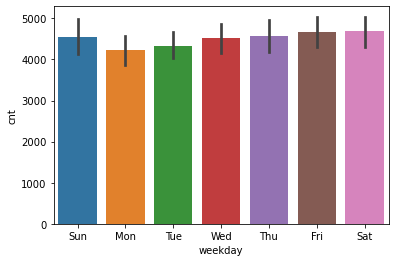

In [20]:
sns.barplot('weekday', 'cnt', data=bike)
plt.show()

#Conclusion: Bike rental demand is more on Friday, Saturday and Sunday

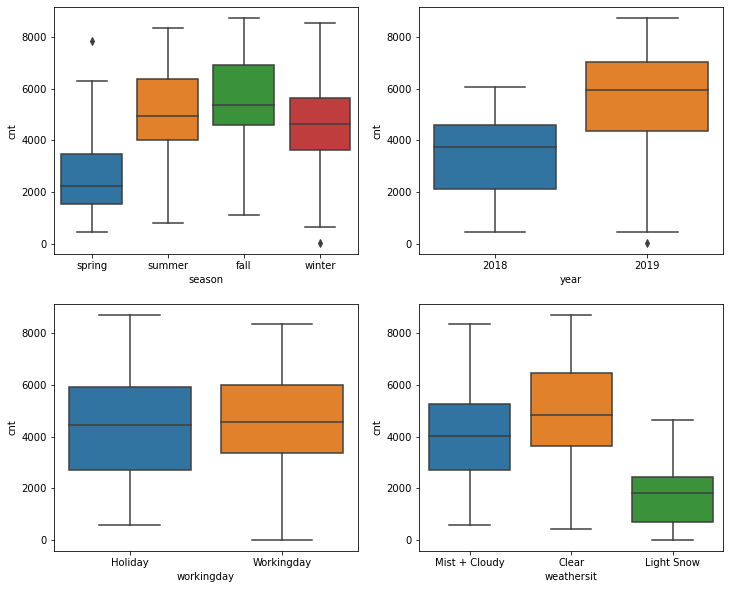

In [21]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='season', y='cnt', data=bike)
plt.subplot(2,2,2)
sns.boxplot(x='year', y='cnt', data=bike)
plt.subplot(2,2,3)
sns.boxplot(x='workingday', y='cnt', data=bike)
plt.subplot(2,2,4)
sns.boxplot(x='weathersit', y='cnt', data=bike)
plt.show()

In [22]:
codes = {2018:0, 2019:1}
bike['year']=bike['year'].map(codes)

bike.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,spring,Sun,Holiday,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985,0,Jan
1,spring,Mon,Holiday,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801,0,Jan
2,spring,Tue,Workingday,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,Jan
3,spring,Wed,Workingday,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,Jan
4,spring,Thu,Workingday,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,Jan


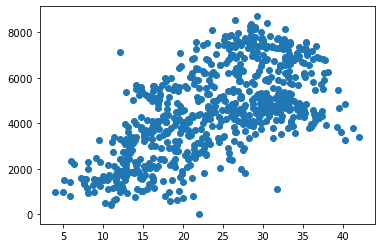

In [23]:
plt.scatter('atemp','cnt',data=bike)
plt.show()

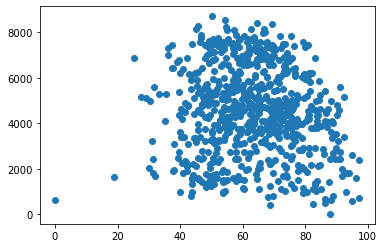

In [24]:
plt.scatter('hum','cnt',data=bike)
plt.show()

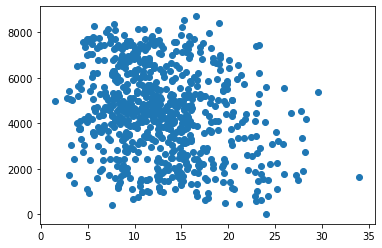

In [25]:
plt.scatter('windspeed','cnt',data=bike)
plt.show()

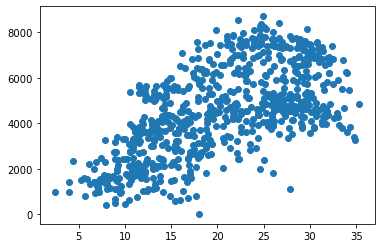

In [26]:
plt.scatter('temp','cnt',data=bike)
plt.show()

#conclusion: Bike rental is more when temparature is high

##### Visualizing the Relationship with each other

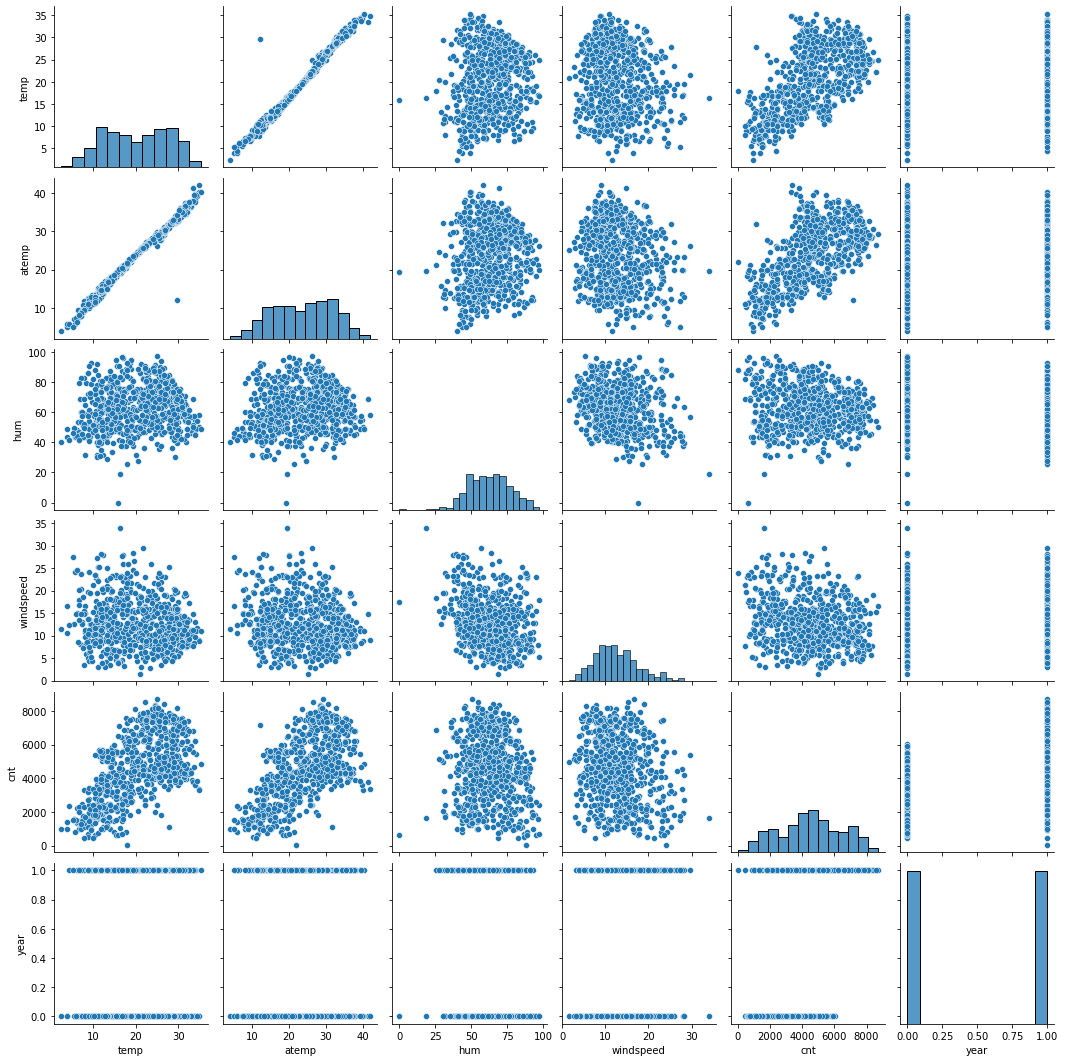

In [27]:
##plt.figure(figsize=(10,8)
sns.pairplot(bike)
plt.show()

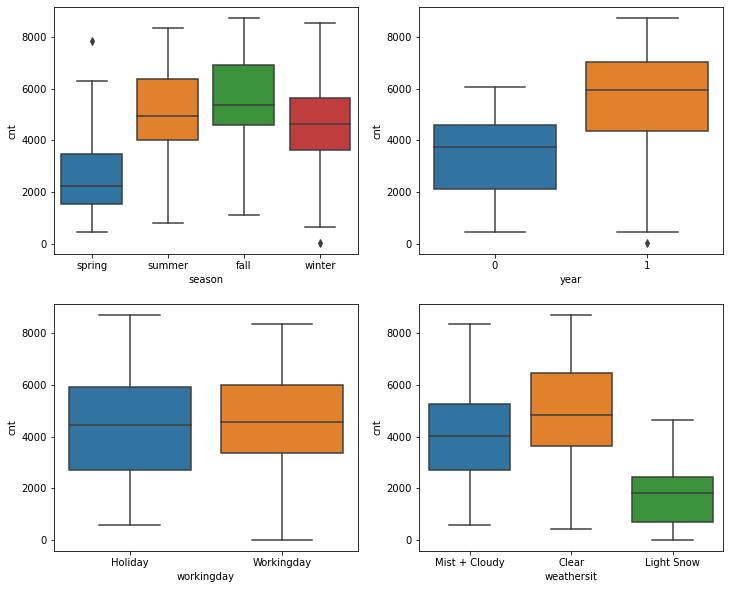

In [28]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='season', y='cnt', data=bike)
plt.subplot(2,2,2)
sns.boxplot(x='year', y='cnt', data=bike)
plt.subplot(2,2,3)
sns.boxplot(x='workingday', y='cnt', data=bike)
plt.subplot(2,2,4)
sns.boxplot(x='weathersit', y='cnt', data=bike)
plt.show()

<AxesSubplot:>

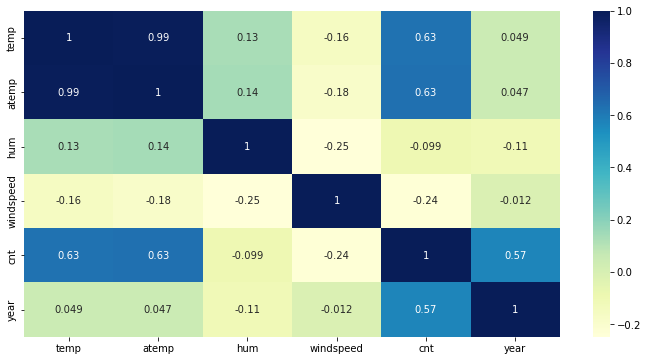

In [29]:
plt.figure(figsize = (12,6))
sns.heatmap(bike.corr(),annot=True, cmap="YlGnBu")

In [30]:
##atemp and temp are highly correlated, to avaoid multi-collinearity will drop atemp
bike=bike.drop(['atemp'], axis=1)


In [31]:
bike.head()

,season,weekday,workingday,weathersit,temp,hum,windspeed,cnt,year,month
0,spring,Sun,Holiday,Mist + Cloudy,14.110847,80.5833,10.749882,985,0,Jan
1,spring,Mon,Holiday,Mist + Cloudy,14.902598,69.6087,16.652113,801,0,Jan
2,spring,Tue,Workingday,Clear,8.050924,43.7273,16.636703,1349,0,Jan
3,spring,Wed,Workingday,Clear,8.200000,59.0435,10.739832,1562,0,Jan
4,spring,Thu,Workingday,Clear,9.305237,43.6957,12.522300,1600,0,Jan


###### Adding dummy variables against categorical variables

In [32]:
seasons = pd.get_dummies(bike['season'],drop_first=True)

working_day = pd.get_dummies(bike['workingday'],drop_first=True)

weather= pd.get_dummies(bike['weathersit'],drop_first=True)

month= pd.get_dummies(bike['month'],drop_first=True)

week_day= pd.get_dummies(bike['weekday'],drop_first=True)

In [33]:
bike= pd.concat([bike,seasons,working_day,weather,month,week_day],axis=1)


In [34]:
bike.head()

,season,weekday,workingday,weathersit,temp,hum,windspeed,cnt,year,month,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,Sun,Holiday,Mist + Cloudy,14.110847,80.5833,10.749882,985,0,Jan,...,0,0,0,0,0,0,1,0,0,0
1,spring,Mon,Holiday,Mist + Cloudy,14.902598,69.6087,16.652113,801,0,Jan,...,0,0,0,0,1,0,0,0,0,0
2,spring,Tue,Workingday,Clear,8.050924,43.7273,16.636703,1349,0,Jan,...,0,0,0,0,0,0,0,0,1,0
3,spring,Wed,Workingday,Clear,8.200000,59.0435,10.739832,1562,0,Jan,...,0,0,0,0,0,0,0,0,0,1
4,spring,Thu,Workingday,Clear,9.305237,43.6957,12.522300,1600,0,Jan,...,0,0,0,0,0,0,0,1,0,0


In [35]:
##Dropping below variables as already encoded to dummy variables
bike.drop(['season','workingday','weathersit','weekday','month'],axis=1,inplace=True)

In [36]:
bike.head()

,temp,hum,windspeed,cnt,year,spring,summer,winter,Workingday,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,14.110847,80.5833,10.749882,985,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,14.902598,69.6087,16.652113,801,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,8.050924,43.7273,16.636703,1349,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,8.200000,59.0435,10.739832,1562,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,9.305237,43.6957,12.522300,1600,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### Distributing the data in Train and Test sets

In [37]:
df_train, df_test = train_test_split(bike, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 28)
(220, 28)


In [38]:
##scaler = StandardScaler()

scaler = MinMaxScaler()

In [39]:

num_vars=['temp','hum','windspeed','cnt']


df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

df_train

C:\Users\Manoj\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,temp,hum,windspeed,cnt,year,spring,summer,winter,Workingday,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
576,0.815169,0.725633,0.264686,0.827658,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
426,0.442393,0.640189,0.255342,0.465255,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
728,0.245101,0.498067,0.663106,0.204096,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,0.395666,0.504508,0.188475,0.482973,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
111,0.345824,0.751824,0.380981,0.191095,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0.863973,0.679690,0.187140,0.832835,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
53,0.202618,0.435939,0.111379,0.218017,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
350,0.248216,0.577930,0.431816,0.312586,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
79,0.462664,0.759870,0.529881,0.236424,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [40]:
df_train[num_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


## Step-3: Training the Model

In [41]:
y_train = df_train.pop('cnt')
X_train = df_train

In [42]:
X_train

,temp,hum,windspeed,year,spring,summer,winter,Workingday,Light Snow,Mist + Cloudy,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
576,0.815169,0.725633,0.264686,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
426,0.442393,0.640189,0.255342,1,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
728,0.245101,0.498067,0.663106,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,0.395666,0.504508,0.188475,1,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
111,0.345824,0.751824,0.380981,0,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0.863973,0.679690,0.187140,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
53,0.202618,0.435939,0.111379,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
350,0.248216,0.577930,0.431816,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
79,0.462664,0.759870,0.529881,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [43]:
## adding constant and creting first model
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_sm).fit()

lr.summary()

C:\Users\Manoj\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          3.00e-181
Time:                        15:41:34   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2440      0.052      4.675      0.000       0.141       0.347
temp              0.4454      0.046      9.628      0.000       0.354       0.536
hum              -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed        -0.1860      0.026     -7.226      0.000      -0.237      -0.135
year              0.2324      0.008     28.819      0.000       0.217       0.248
spring           -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer            0.0430      0.026      1.645      0.101      -0.008       0.094
winter            0.1076      0.028      3.853      0.000       0.053       0.163
Workingday        0.0861      0.027      3.234      0.001       0.034       0.138
Light Snow       -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mist + Cloudy    -0.0596      0.010     -5.709      0.000      -0.080      -0.039
Aug               0.0204      0.034      0.607      0.544      -0.046       0.086
Dec              -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb              -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan              -0.0633      0.034     -1.885      0.060      -0.129       0.003
Jul              -0.0338      0.035     -0.969      0.333      -0.102       0.035
Jun               0.0046      0.025      0.186      0.853      -0.044       0.053
Mar               0.0013      0.025      0.052      0.959      -0.047       0.050
May               0.0247      0.021      1.173      0.241      -0.017       0.066
Nov              -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct               0.0075      0.036      0.210      0.834      -0.063       0.078
Sep               0.0859      0.032      2.692      0.007       0.023       0.149
Mon               0.0404      0.030      1.346      0.179      -0.019       0.099
Sat               0.0091      0.016      0.588      0.557      -0.021       0.040
Sun               0.0946      0.030      3.163      0.002       0.036       0.153
Thu               0.0036      0.015      0.248      0.804      -0.025       0.032
Tue              -0.0118      0.015     -0.780      0.436      -0.042       0.018
Wed              -0.0088      0.015     -0.571      0.568      -0.039       0.022
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                         39.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of th

In [44]:
#Checking VIF
vif=pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = 'VIF', ascending = False)

vif

,Features,VIF
1,hum,39.67
0,temp,38.19
7,Workingday,22.49
4,spring,12.39
6,winter,12.10
5,summer,7.93
23,Sun,6.46
19,Oct,6.37
10,Aug,6.24
18,Nov,6.07


In [45]:
#removal of high P-value variable, as it seems to be insignificant
X = X_train.drop(['Mar','Jun','Oct','Thu','Wed','Sat','Aug'], axis=1)
X

,temp,hum,windspeed,year,spring,summer,winter,Workingday,Light Snow,Mist + Cloudy,Dec,Feb,Jan,Jul,May,Nov,Sep,Mon,Sun,Tue
576,0.815169,0.725633,0.264686,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
426,0.442393,0.640189,0.255342,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
728,0.245101,0.498067,0.663106,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
482,0.395666,0.504508,0.188475,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
111,0.345824,0.751824,0.380981,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0.863973,0.679690,0.187140,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
53,0.202618,0.435939,0.111379,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
350,0.248216,0.577930,0.431816,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0
79,0.462664,0.759870,0.529881,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1


In [46]:
## Re-executing the model on remaining dataset
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train,X_train_sm).fit()

lr.summary()

C:\Users\Manoj\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.7
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          3.51e-188
Time:                        15:41:34   Log-Likelihood:                 526.03
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     489   BIC:                            -921.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2580      0.046      5.582      0.000       0.167       0.349
temp              0.4505      0.038     11.777      0.000       0.375       0.526
hum              -0.1518      0.038     -4.038      0.000      -0.226      -0.078
windspeed        -0.1869      0.025     -7.358      0.000      -0.237      -0.137
year              0.2323      0.008     29.122      0.000       0.217       0.248
spring           -0.0562      0.022     -2.566      0.011      -0.099      -0.013
summer            0.0296      0.017      1.751      0.081      -0.004       0.063
winter            0.1004      0.018      5.639      0.000       0.065       0.135
Workingday        0.0856      0.026      3.254      0.001       0.034       0.137
Light Snow       -0.2557      0.026     -9.802      0.000      -0.307      -0.204
Mist + Cloudy    -0.0586      0.010     -5.683      0.000      -0.079      -0.038
Dec              -0.0492      0.018     -2.718      0.007      -0.085      -0.014
Feb              -0.0350      0.021     -1.636      0.102      -0.077       0.007
Jan              -0.0649      0.021     -3.062      0.002      -0.107      -0.023
Jul              -0.0507      0.018     -2.825      0.005      -0.086      -0.015
May               0.0222      0.017      1.285      0.199      -0.012       0.056
Nov              -0.0475      0.019     -2.525      0.012      -0.084      -0.011
Sep               0.0718      0.017      4.314      0.000       0.039       0.104
Mon               0.0389      0.029      1.364      0.173      -0.017       0.095
Sun               0.0934      0.028      3.289      0.001       0.038       0.149
Tue              -0.0130      0.012     -1.102      0.271      -0.036       0.010
==============================================================================
Omnibus:                       84.077   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.009
Skew:                          -0.797   Prob(JB):                     5.64e-52
Kurtosis:                       5.926   Cond. No.                         28.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
##Checking VIF
vif=pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = 'VIF', ascending = False)

vif

,Features,VIF
1,hum,35.40
0,temp,22.60
7,Workingday,19.79
4,spring,6.09
18,Sun,5.49
17,Mon,5.26
2,windspeed,5.09
6,winter,4.45
5,summer,3.75
12,Jan,2.43


In [48]:
#removal of high P-value variable, as it seems to be insignificant
X1= X.drop(['Tue','May','Mon','Feb','summer'],axis=1)
X1

,temp,hum,windspeed,year,spring,winter,Workingday,Light Snow,Mist + Cloudy,Dec,Jan,Jul,Nov,Sep,Sun
576,0.815169,0.725633,0.264686,1,0,0,1,0,0,0,0,1,0,0,0
426,0.442393,0.640189,0.255342,1,1,0,0,0,1,0,0,0,0,0,1
728,0.245101,0.498067,0.663106,1,1,0,0,0,0,1,0,0,0,0,0
482,0.395666,0.504508,0.188475,1,0,0,0,0,1,0,0,0,0,0,1
111,0.345824,0.751824,0.380981,0,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0.863973,0.679690,0.187140,1,0,0,1,0,0,0,0,0,0,0,0
53,0.202618,0.435939,0.111379,0,1,0,1,0,0,0,0,0,0,0,0
350,0.248216,0.577930,0.431816,0,0,1,0,0,1,1,0,0,0,0,1
79,0.462664,0.759870,0.529881,0,0,0,1,0,1,0,0,0,0,0,0


In [49]:
##re-executing model on remaining dataset
X_train_sm = sm.add_constant(X1)

lr = sm.OLS(y_train,X_train_sm).fit()

lr.summary()

C:\Users\Manoj\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     182.1
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          3.98e-190
Time:                        15:41:35   Log-Likelihood:                 517.32
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     494   BIC:                            -934.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3172      0.033      9.623      0.000       0.252       0.382
temp              0.4274      0.033     13.094      0.000       0.363       0.492
hum              -0.1362      0.037     -3.637      0.000      -0.210      -0.063
windspeed        -0.1803      0.026     -7.071      0.000      -0.230      -0.130
year              0.2321      0.008     28.884      0.000       0.216       0.248
spring           -0.1028      0.015     -6.753      0.000      -0.133      -0.073
winter            0.0731      0.014      5.197      0.000       0.045       0.101
Workingday        0.0520      0.011      4.784      0.000       0.031       0.073
Light Snow       -0.2610      0.026     -9.939      0.000      -0.313      -0.209
Mist + Cloudy    -0.0596      0.010     -5.720      0.000      -0.080      -0.039
Dec              -0.0485      0.017     -2.829      0.005      -0.082      -0.015
Jan              -0.0537      0.018     -3.008      0.003      -0.089      -0.019
Jul              -0.0685      0.017     -4.021      0.000      -0.102      -0.035
Nov              -0.0529      0.018     -2.891      0.004      -0.089      -0.017
Sep               0.0527      0.015      3.437      0.001       0.023       0.083
Sun               0.0623      0.014      4.449      0.000       0.035       0.090
==============================================================================
Omnibus:                       81.460   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.591
Skew:                          -0.759   Prob(JB):                     1.55e-52
Kurtosis:                       5.987   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
#Checking VIF
vif=pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = 'VIF', ascending = False)

vif

,Features,VIF
1,hum,25.17
0,temp,17.69
6,Workingday,4.67
2,windspeed,4.18
5,winter,2.99
4,spring,2.97
8,Mist + Cloudy,2.26
3,year,2.07
14,Sun,1.83
12,Nov,1.81


In [51]:
#removal of high P-value/VIF variable, as it seems to be insignificant
X2= X1.drop(['hum','Dec','Jan','Nov'],axis=1)
X2

,temp,windspeed,year,spring,winter,Workingday,Light Snow,Mist + Cloudy,Jul,Sep,Sun
576,0.815169,0.264686,1,0,0,1,0,0,1,0,0
426,0.442393,0.255342,1,1,0,0,0,1,0,0,1
728,0.245101,0.663106,1,1,0,0,0,0,0,0,0
482,0.395666,0.188475,1,0,0,0,0,1,0,0,1
111,0.345824,0.380981,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
578,0.863973,0.187140,1,0,0,1,0,0,0,0,0
53,0.202618,0.111379,0,1,0,1,0,0,0,0,0
350,0.248216,0.431816,0,0,1,0,0,1,0,0,1
79,0.462664,0.529881,0,0,0,1,0,1,0,0,0


In [52]:
#re-executing model on remaining dataset
X_train_sm = sm.add_constant(X2)

lr = sm.OLS(y_train,X_train_sm).fit()

lr.summary()

C:\Users\Manoj\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     231.8
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          7.02e-188
Time:                        15:41:35   Log-Likelihood:                 500.83
No. Observations:                 510   AIC:                            -977.7
Df Residuals:                     498   BIC:                            -926.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2051      0.025      8.103      0.000       0.155       0.255
temp              0.4494      0.030     14.848      0.000       0.390       0.509
windspeed        -0.1412      0.025     -5.672      0.000      -0.190      -0.092
year              0.2346      0.008     28.588      0.000       0.218       0.251
spring           -0.1131      0.015     -7.511      0.000      -0.143      -0.084
winter            0.0457      0.012      3.709      0.000       0.021       0.070
Workingday        0.0541      0.011      4.858      0.000       0.032       0.076
Light Snow       -0.2895      0.025    -11.738      0.000      -0.338      -0.241
Mist + Cloudy    -0.0811      0.009     -9.279      0.000      -0.098      -0.064
Jul              -0.0702      0.017     -4.056      0.000      -0.104      -0.036
Sep               0.0538      0.016      3.433      0.001       0.023       0.085
Sun               0.0657      0.014      4.579      0.000       0.037       0.094
==============================================================================
Omnibus:                       69.835   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.680
Skew:                          -0.683   Prob(JB):                     7.89e-41
Kurtosis:                       5.613   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
#Checking VIF
vif=pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = 'VIF', ascending = False)

vif

,Features,VIF
0,temp,6.55
5,Workingday,4.47
1,windspeed,4.11
2,year,2.06
3,spring,1.81
10,Sun,1.79
7,Mist + Cloudy,1.55
4,winter,1.44
8,Jul,1.36
9,Sep,1.20


#### From all below parameters, we can conclude that our model is good
1. P-value of all variables almost equal to 0
2. R-squared and Adj R-squared are 83.7% and 83.50% respectively
3. VIF of all variables is lesss than 5 except temp and we are not removing it, as temp is having string correlation with cnt which we have already identified earlier in pairplot

## Step-4: Residual Analysis

In [54]:
y_train_pred = lr.predict(X_train_sm)

C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


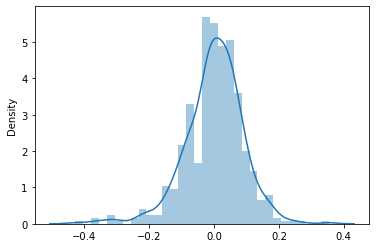

In [55]:
res = y_train - y_train_pred
sns.distplot(res)

plt.show()

#### From residual analysis observed that error distribution is centered at 0 and approximately normal

## Step-5: Prediction and Evaluation on Test Set

In [56]:
num_vars=['temp','hum','windspeed','cnt']


df_test[num_vars]=scaler.transform(df_test[num_vars])

df_test.head()

C:\Users\Manoj\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,temp,hum,windspeed,cnt,year,spring,summer,winter,Workingday,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
184,0.831783,0.657364,0.084219,0.692706,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
535,0.901354,0.610133,0.153728,0.712034,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0.511964,0.837699,0.334206,0.303382,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
221,0.881625,0.437098,0.339570,0.547400,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
152,0.817246,0.314298,0.537414,0.569029,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df_test.describe()

,temp,hum,windspeed,cnt,year,spring,summer,winter,Workingday,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.638221,0.313293,0.522154,0.481818,0.254545,0.263636,0.236364,0.700000,0.027273,...,0.086364,0.072727,0.086364,0.086364,0.145455,0.177273,0.118182,0.100000,0.127273,0.168182
std,0.233187,0.148694,0.159584,0.219163,0.500809,0.436599,0.441609,0.425817,0.459303,0.163248,...,0.281541,0.260281,0.281541,0.281541,0.353363,0.382770,0.323559,0.300684,0.334038,0.374881
min,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
y_test = df_test.pop('cnt')
X_test = df_test

In [59]:
X2.columns

Index(['temp', 'windspeed', 'year', 'spring', 'winter', 'Workingday',
       'Light Snow', 'Mist + Cloudy', 'Jul', 'Sep', 'Sun'],
      dtype='object')

In [60]:
X_test_Final=X_test[X2.columns]
X_test_Final=sm.add_constant(X_test_Final)

C:\Users\Manoj\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [61]:
y_test_pred = lr.predict(X_test_Final)


### Identifying r2_score

In [62]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8112768022415888

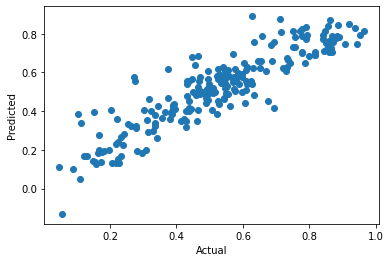

In [63]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Conclusion:
#### Top 5 features benifitting the Bike Rental counts are:
1. Spring Season
2. Temparature
3. Mist cloudy weather
4. Workingday
5. Sunday

#### Assumptions:
1. Accuracy of Test and Train sets are nearly equal, no overfitting/underfitting is observed
2. Error terms are normally distributed
3. Predicted values and actual values are hving linear relation